In [ ]:

import src.alex.reaction_diffusion as rd
import src.matijs.analysis as diffdla_analysis

/home/matijs/miniconda3/envs/CLS/lib/python3.12/site-packages/imageio_ffmpeg/binaries/ffmpeg-linux-x86_64-v7.0.2


# Part I

In [3]:
print("Optimal omegas for each eta in a 100x100 grid")
print("Eta | Omega | SOR Iterations")
for eta in [0.5,0.75,1,1.25,1.5,1.7]:
    omega, iters = diffdla_analysis.optimize_omega(100,100,eta)
    print(f"{eta} | {omega} | {iters}")

Optimal omegas for each eta in a 100x100 grid
Eta | Omega | SOR Iterations


0.5 | 1.775 | 36.7
0.75 | 1.7875 | 50.07
1 | 1.7875 | 44.4
1.25 | 1.7875 | 52.44
1.5 | 1.9 | 63.35
1.7 | 1.7875 | 69.89


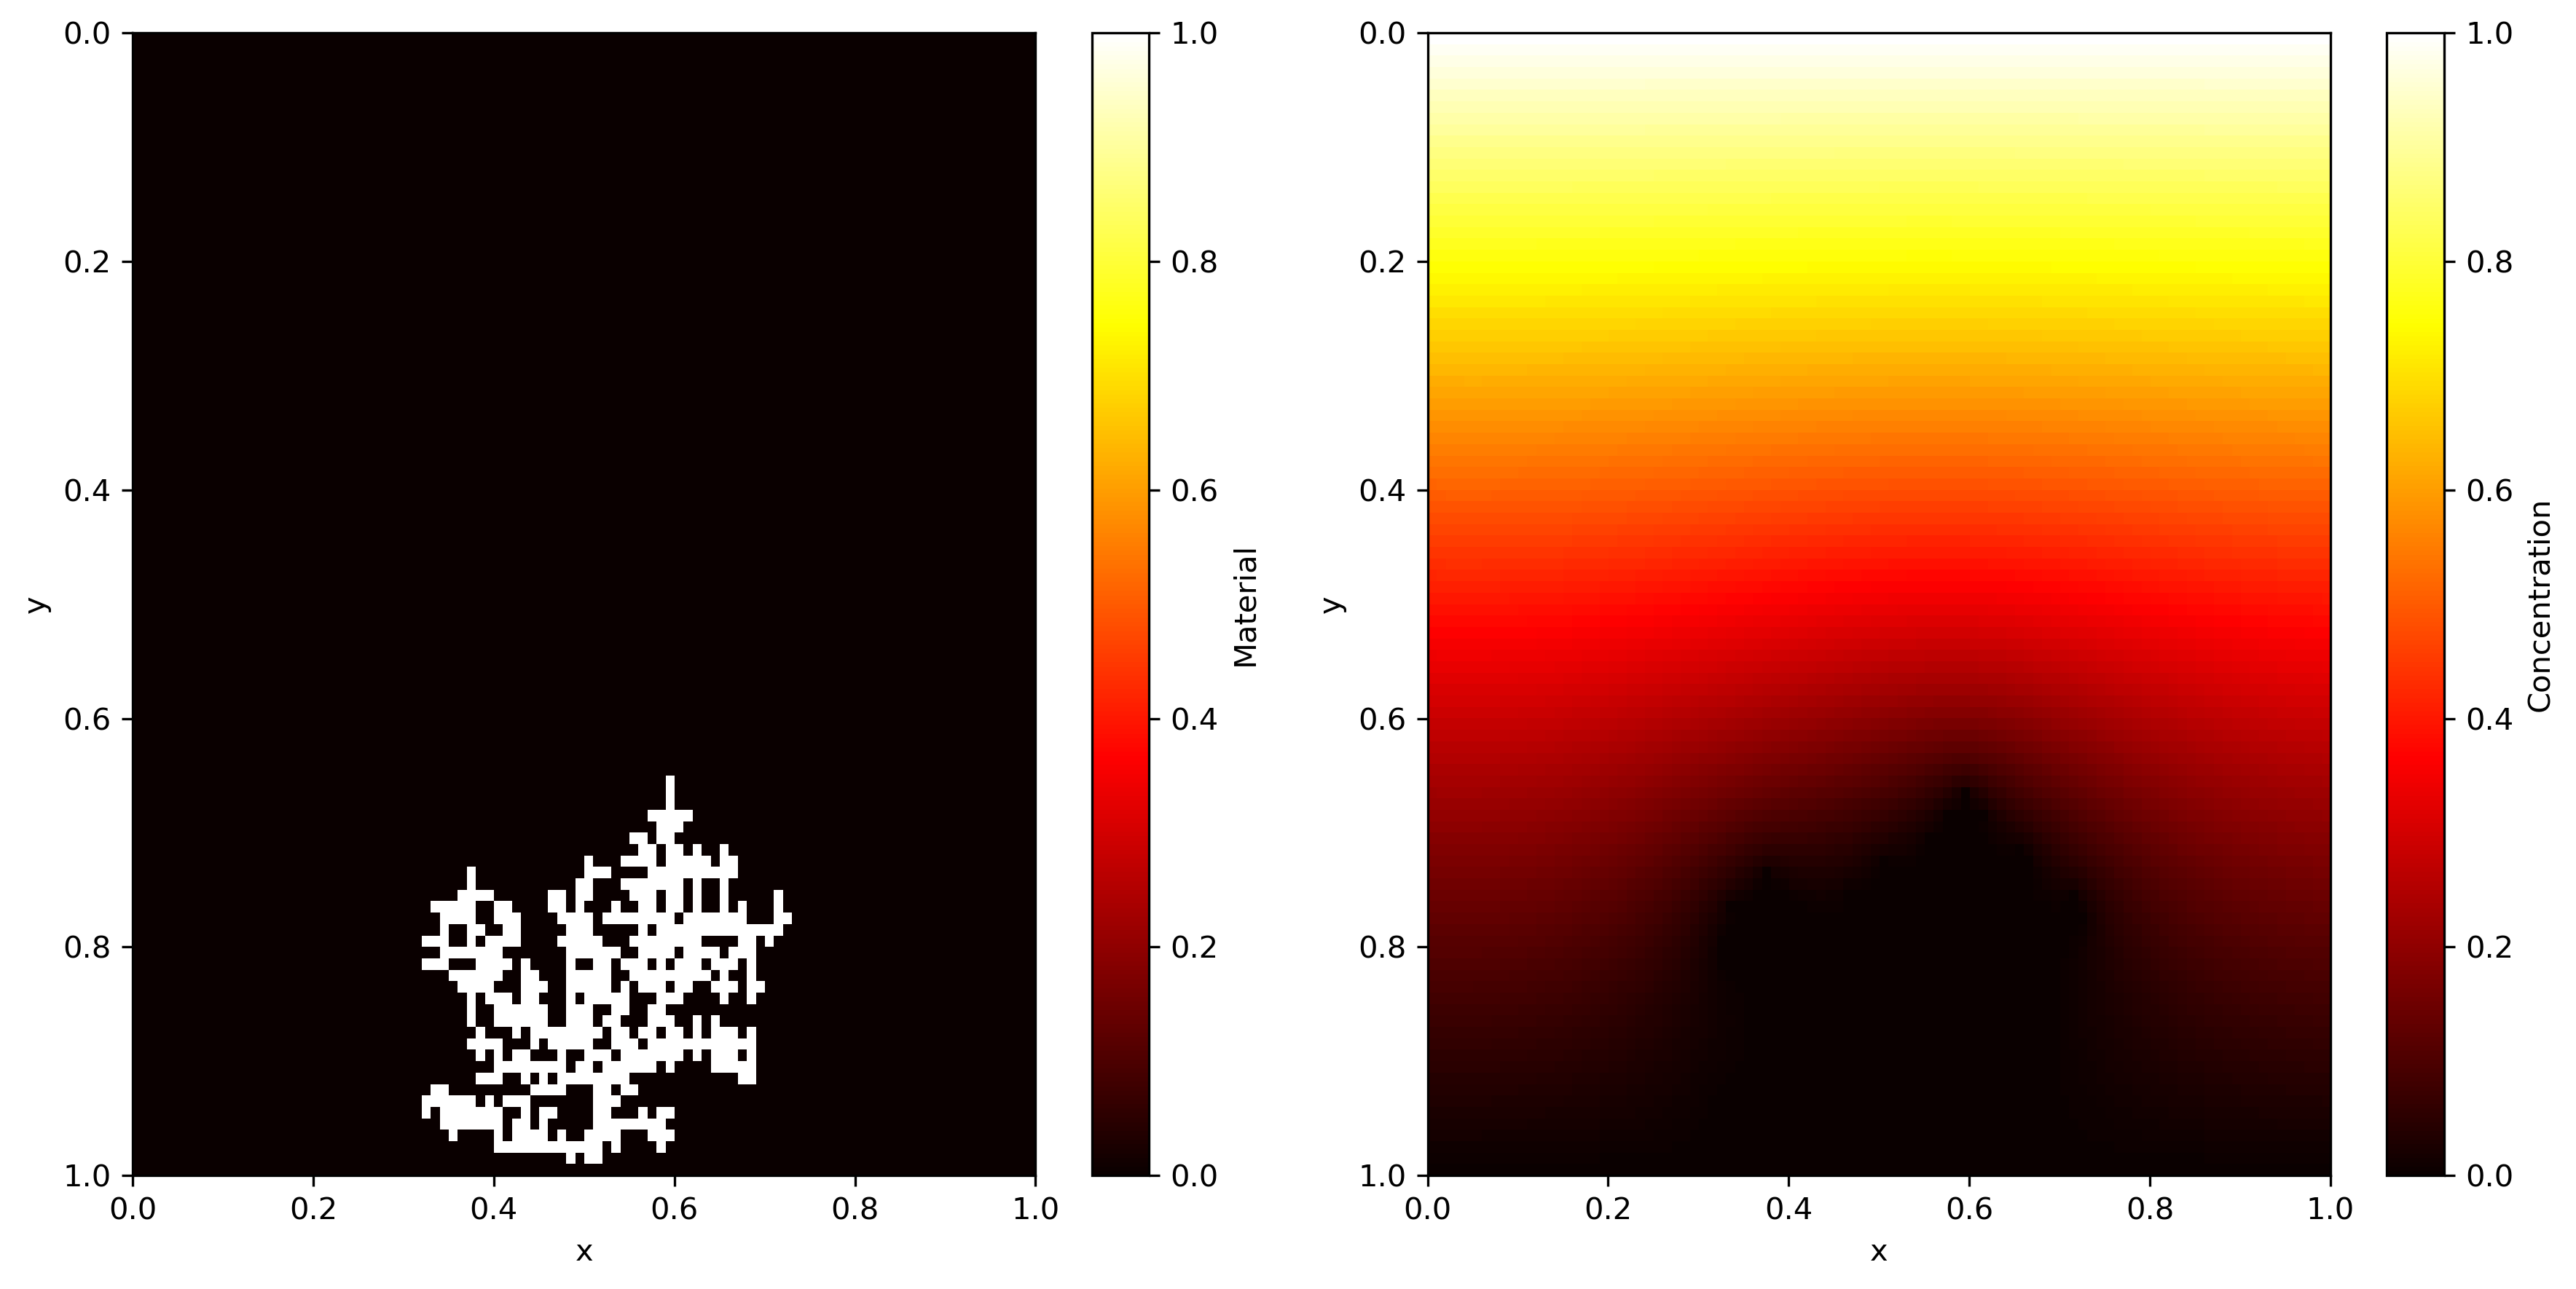

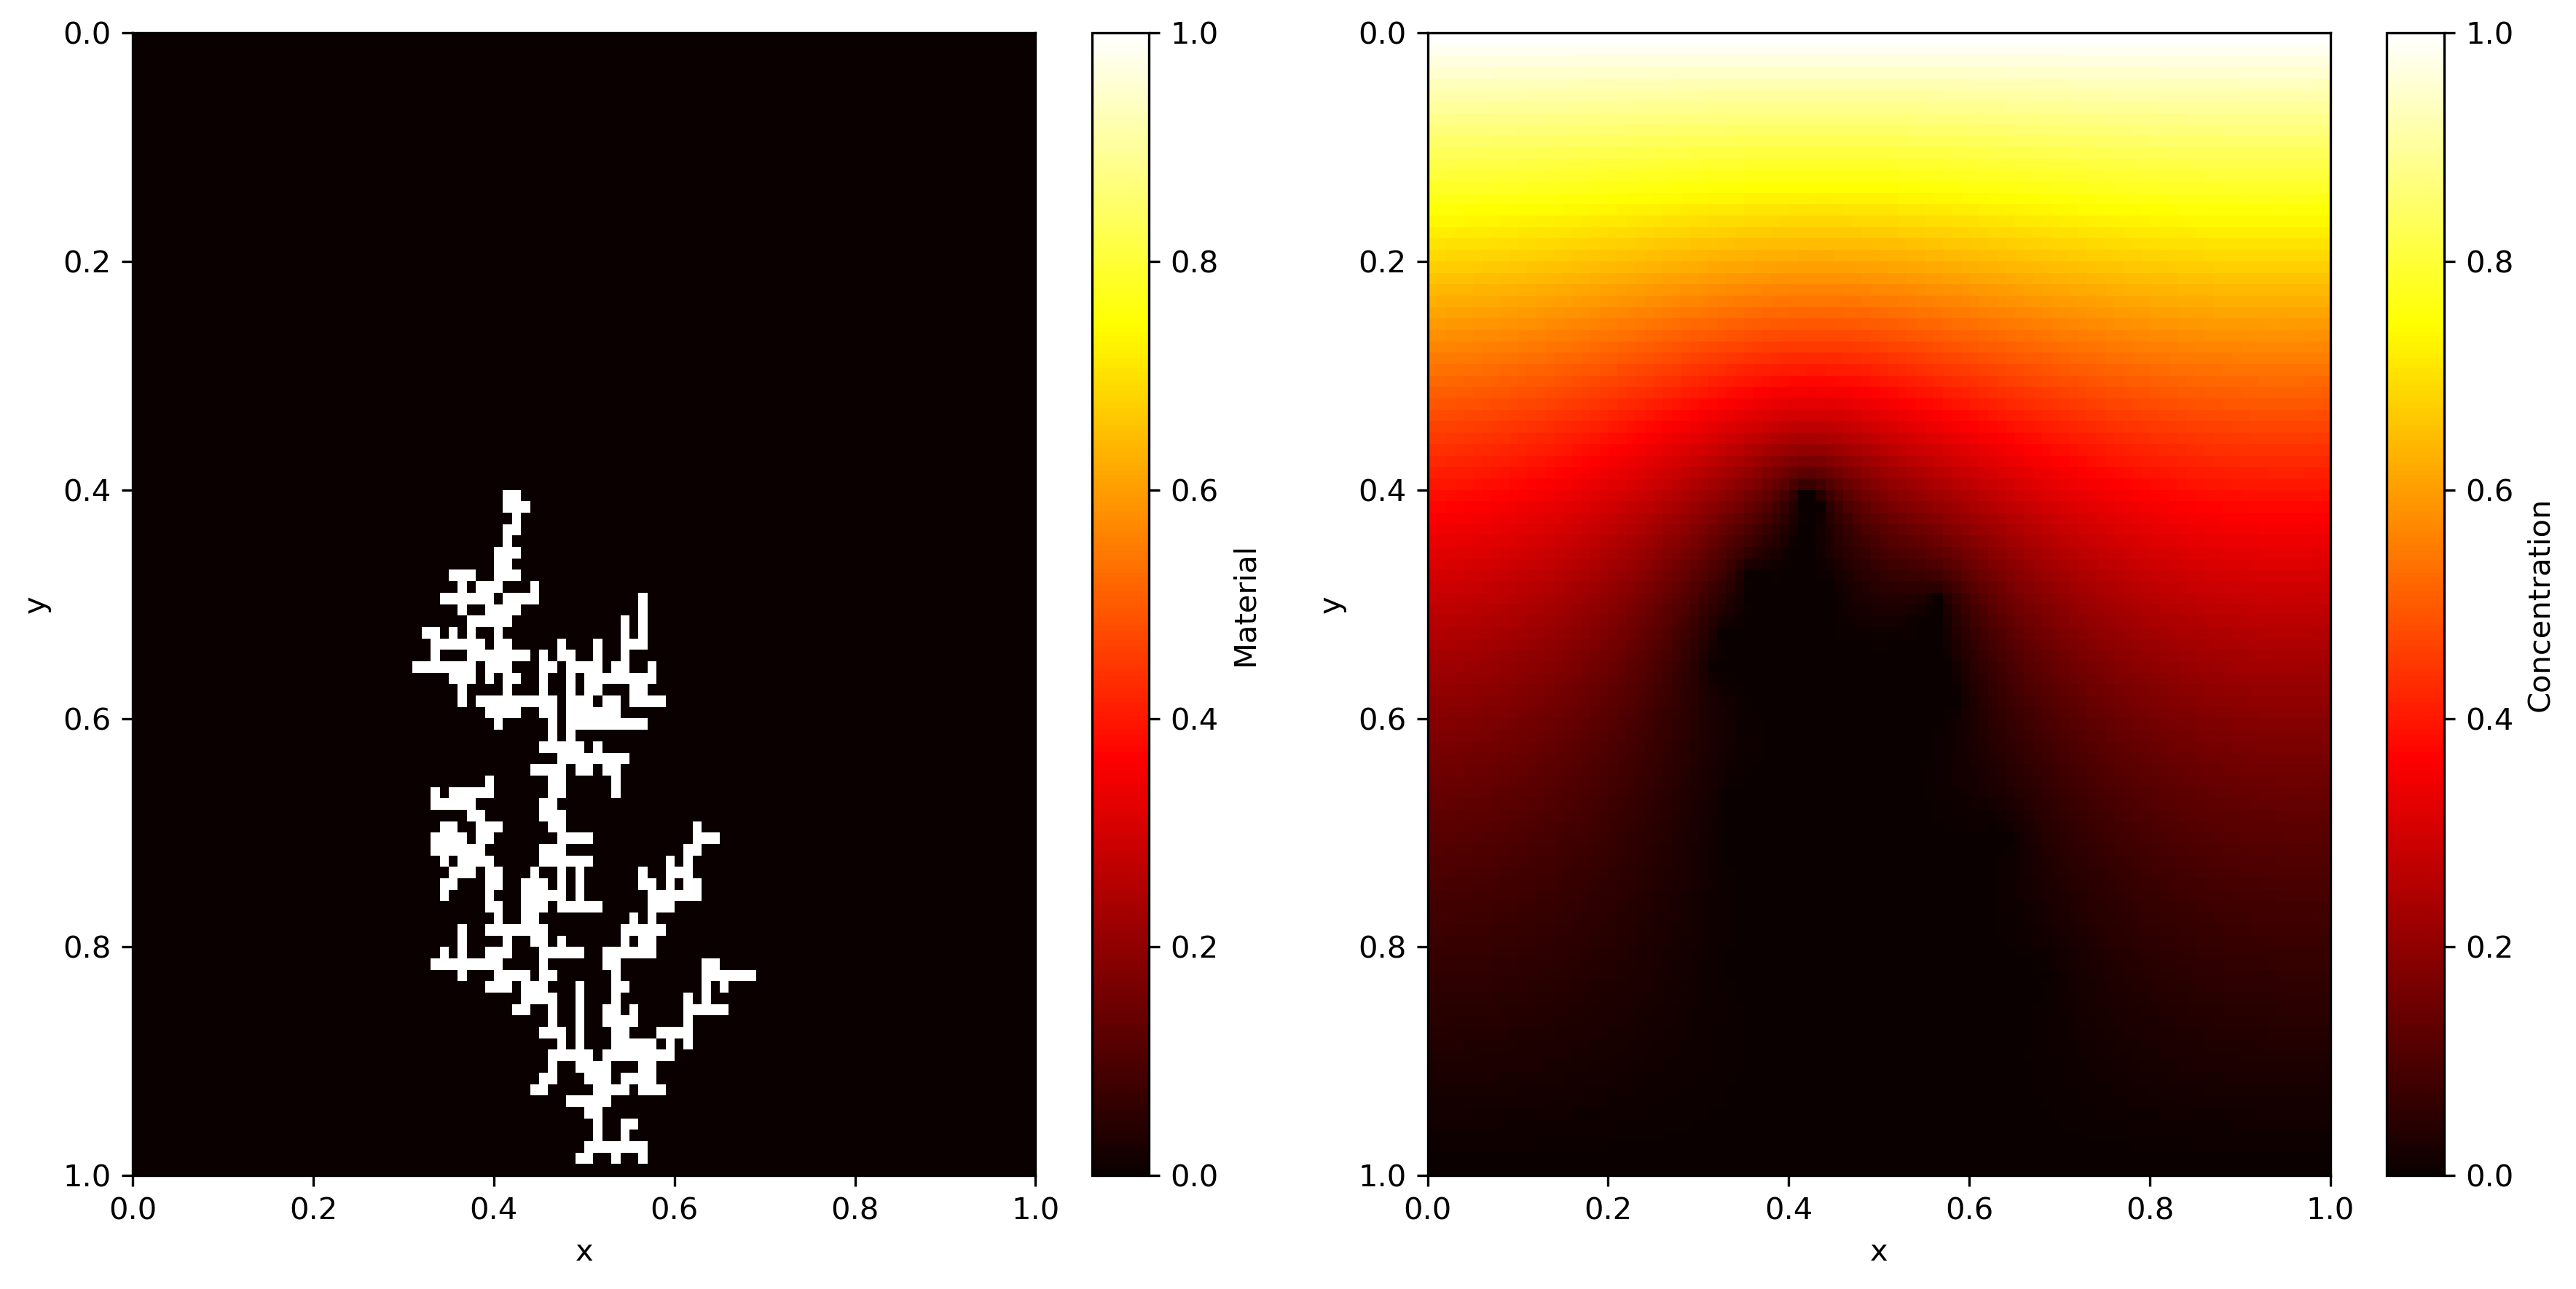

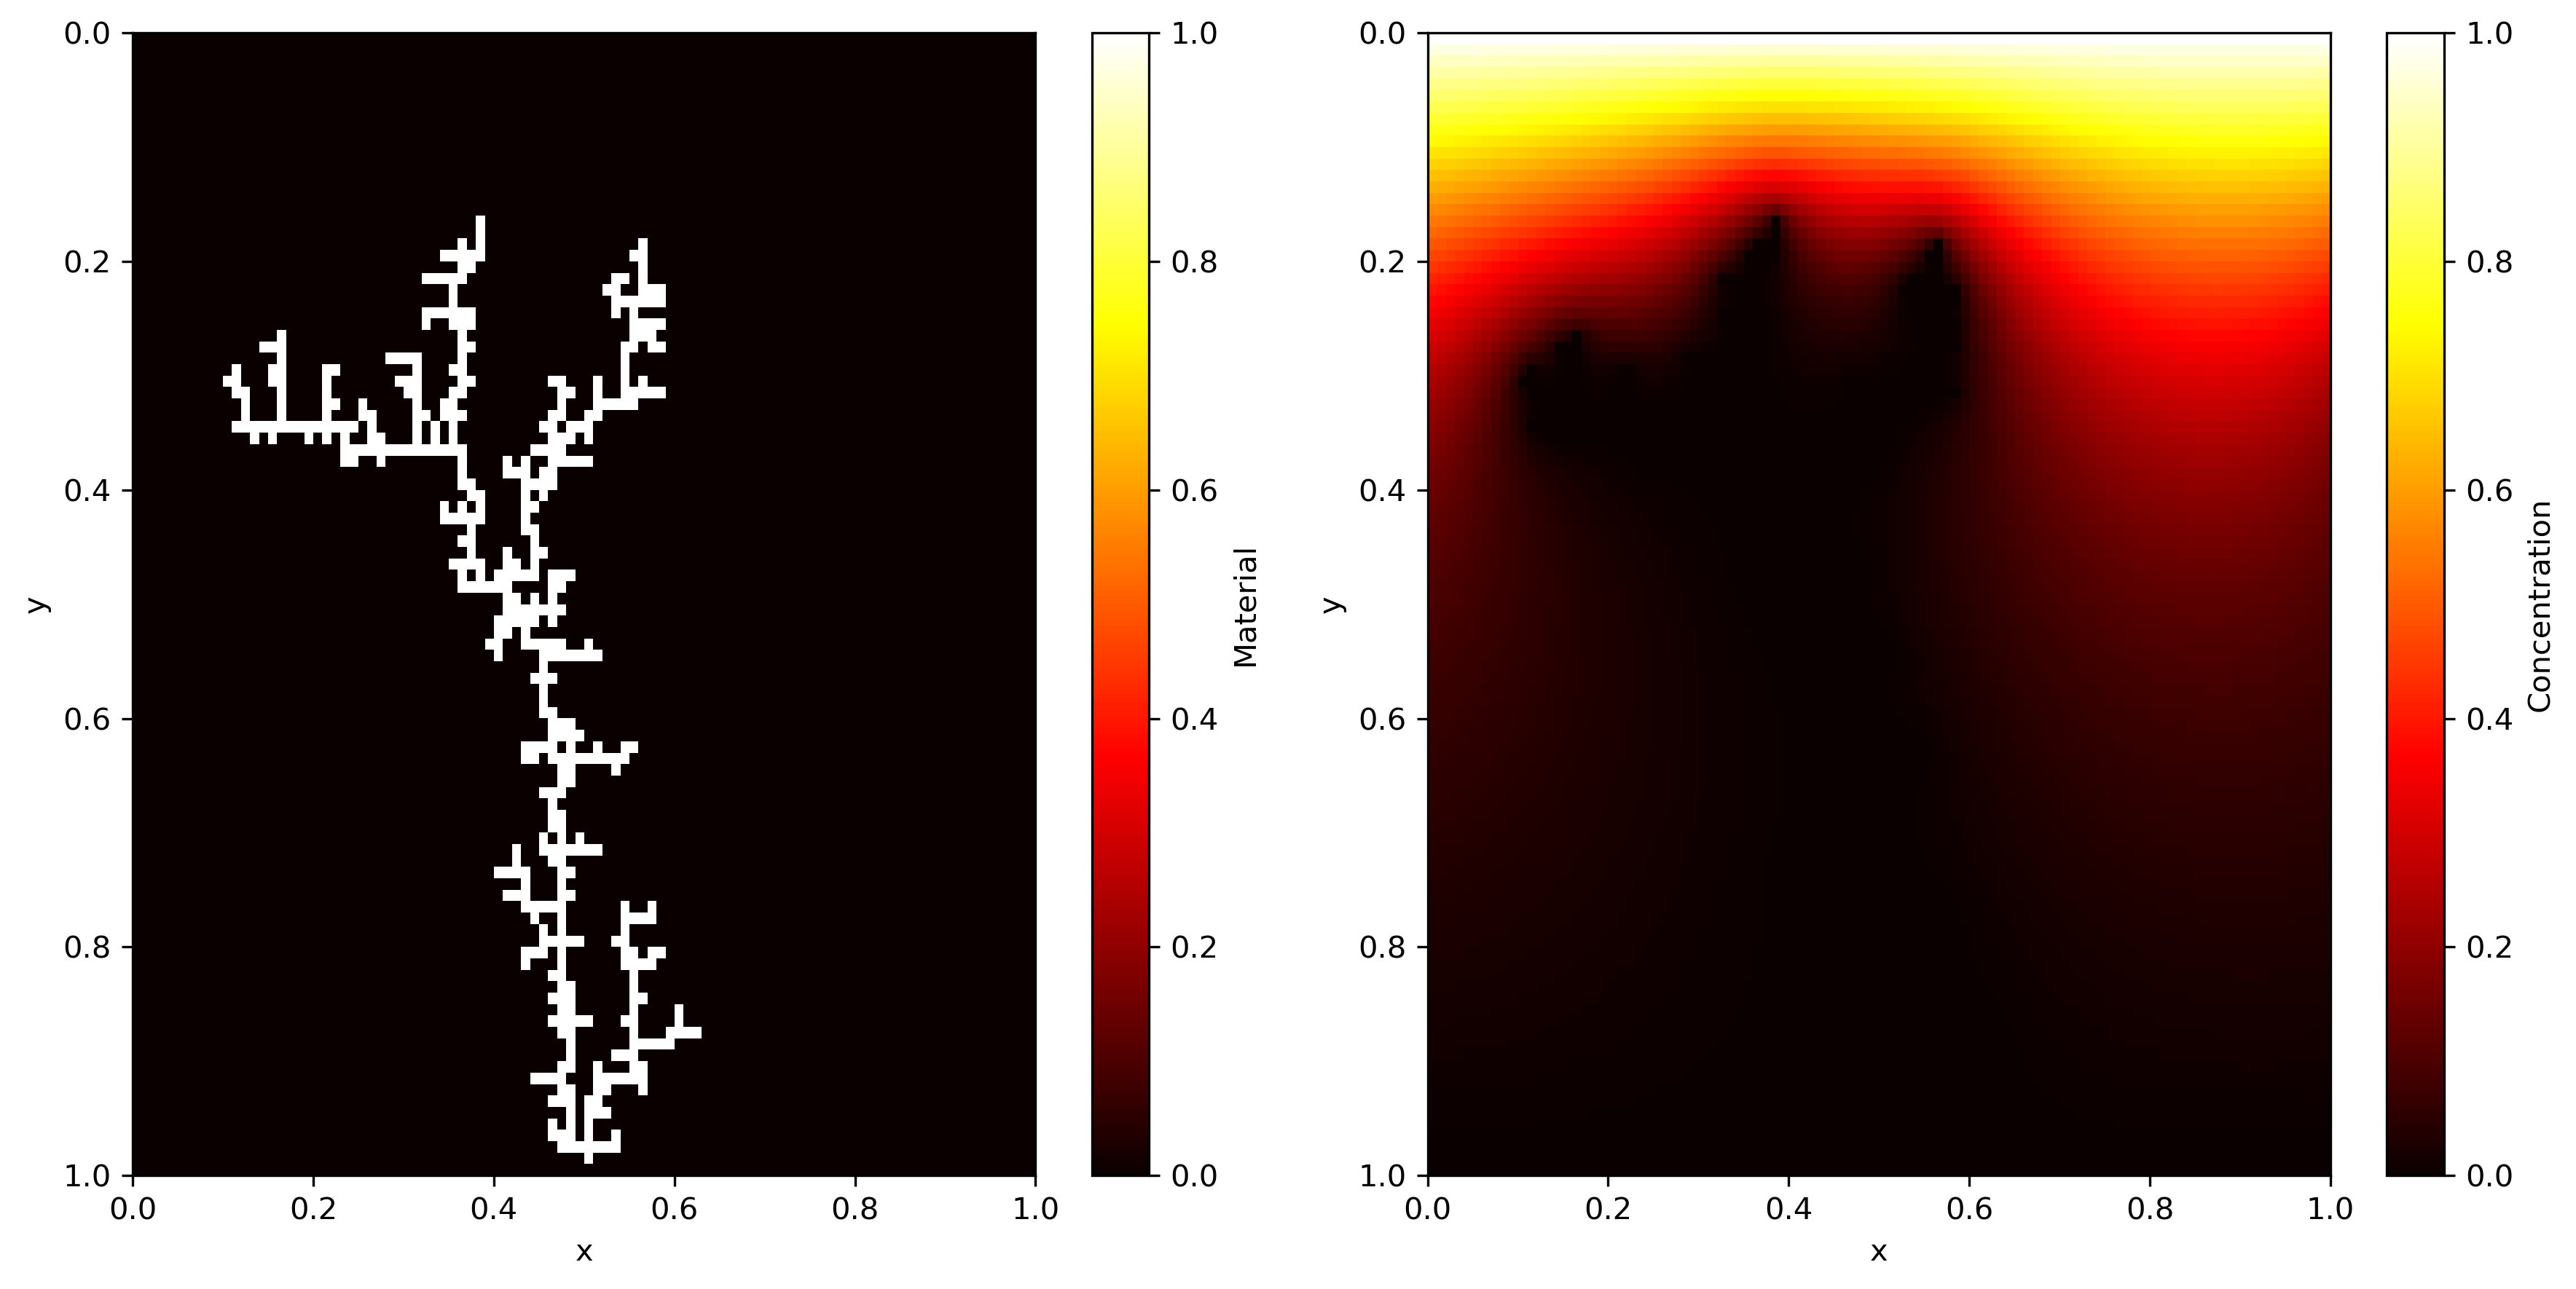

In [2]:
diffdla_analysis.plot_end(N=100,M=100,eta=0.5,omega=1.77,growth_iterations=500)
diffdla_analysis.plot_end(N=100,M=100,eta=1,omega=1.78,growth_iterations=500)
diffdla_analysis.plot_end(N=100,M=100,eta=1.5,omega=1.9,growth_iterations=500)

In [ ]:
# fractal dimension calculation 

# Part II

In [ ]:
# your presentation code here

# Part III

In [ ]:
# plot_html is for ipynb animation showing
rd.reset_global_UV()
rd.plot_html(boundary_condition="PBC", observed_variable = "V", f_value = 0.022, k_value = 0.051)

In [ ]:
# plot_html is for ipynb animation showing
rd.reset_global_UV()
rd.plot_html(boundary_condition="PBC", observed_variable = "V", f_value = 0.030, k_value = 0.060)

In [ ]:
# plot_html is for ipynb animation showing
rd.reset_global_UV()
rd.plot_html(boundary_condition="PBC", observed_variable = "V", f_value = 0.047, k_value = 0.063)

In [ ]:
# plot_animation is for saving the animation as a mp4 in the fig folder

# f = 0.022, k = 0.051
# f = 0.030, k = 0.060
# f = 0.047, k = 0.063
fkSet = [
    {0.022, 0.051},
    {0.030, 0.060},
    {0.047, 0.063}
    ]

for v in fkSet:
    f = v.pop()
    k = v.pop()
    
    # periodic boundary condition
    rd.plot_animation("PBC", observed_variable = "V", f_value = f, k_value = k)

    # Dirichlet boundary condition
    rd.plot_animation("Dirichlet Strong", observed_variable = "V", f_value = f, k_value = k)